In [1]:
#importing
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
df=pd.read_csv('weather.csv')
df.head()

,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,WindSpeed9am,...,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RISK_MM,RainTomorrow
0,8.0,24.3,0.0,3.4,6.3,NW,30.0,SW,NW,6.0,...,29,1019.7,1015.0,7,7,14.4,23.6,No,3.6,Yes
1,14.0,26.9,3.6,4.4,9.7,ENE,39.0,E,W,4.0,...,36,1012.4,1008.4,5,3,17.5,25.7,Yes,3.6,Yes
2,13.7,23.4,3.6,5.8,3.3,NW,85.0,N,NNE,6.0,...,69,1009.5,1007.2,8,7,15.4,20.2,Yes,39.8,Yes
3,13.3,15.5,39.8,7.2,9.1,NW,54.0,WNW,W,30.0,...,56,1005.5,1007.0,2,7,13.5,14.1,Yes,2.8,Yes
4,7.6,16.1,2.8,5.6,10.6,SSE,50.0,SSE,ESE,20.0,...,49,1018.3,1018.5,7,7,11.1,15.4,Yes,0.0,No


In [49]:
#check unique and null values

for i in df.columns:
    print(i,df[i].nunique())

df=df.fillna(df.mean())
df

print(df.isnull().sum())

MinTemp 180
MaxTemp 187
Rainfall 47
Evaporation 55
Sunshine 114
WindGustDir 17
WindGustSpeed 35
WindDir9am 17
WindDir3pm 17
WindSpeed9am 22
WindSpeed3pm 26
Humidity9am 60
Humidity3pm 74
Pressure9am 190
Pressure3pm 193
Cloud9am 9
Cloud3pm 9
Temp9am 178
Temp3pm 200
RainToday 2
RISK_MM 47
RainTomorrow 2
MinTemp          0
MaxTemp          0
Rainfall         0
Evaporation      0
Sunshine         0
WindGustDir      0
WindGustSpeed    0
WindDir9am       0
WindDir3pm       0
WindSpeed9am     0
WindSpeed3pm     0
Humidity9am      0
Humidity3pm      0
Pressure9am      0
Pressure3pm      0
Cloud9am         0
Cloud3pm         0
Temp9am          0
Temp3pm          0
RainToday        0
RISK_MM          0
RainTomorrow     0
dtype: int64


In [34]:
for i in df.columns:
    print(i,(df[i].isnull().sum()/len(df[i]))*100)

MinTemp 0.0
MaxTemp 0.0
Rainfall 0.0
Evaporation 0.0
Sunshine 0.0
WindGustDir 0.0
WindGustSpeed 0.0
WindDir9am 0.0
WindDir3pm 0.0
WindSpeed9am 0.0
WindSpeed3pm 0.0
Humidity9am 0.0
Humidity3pm 0.0
Pressure9am 0.0
Pressure3pm 0.0
Cloud9am 0.0
Cloud3pm 0.0
Temp9am 0.0
Temp3pm 0.0
RainToday 0.0
RISK_MM 0.0
RainTomorrow 0.0


In [48]:
#encoding

df=pd.read_csv('weather.csv')

from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()

for i in ['WindGustDir','RainToday','RISK_MM','RainTomorrow','WindDir9am','WindDir3pm']:
    df[i]=le.fit_transform(df[i])
df.head()

,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,WindSpeed9am,...,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RISK_MM,RainTomorrow
0,8.0,24.3,0.0,3.4,6.3,7,30.0,12,7,6.0,...,29,1019.7,1015.0,7,7,14.4,23.6,0,16,1
1,14.0,26.9,3.6,4.4,9.7,1,39.0,0,13,4.0,...,36,1012.4,1008.4,5,3,17.5,25.7,1,16,1
2,13.7,23.4,3.6,5.8,3.3,7,85.0,3,5,6.0,...,69,1009.5,1007.2,8,7,15.4,20.2,1,46,1
3,13.3,15.5,39.8,7.2,9.1,7,54.0,14,13,30.0,...,56,1005.5,1007.0,2,7,13.5,14.1,1,13,1
4,7.6,16.1,2.8,5.6,10.6,10,50.0,10,2,20.0,...,49,1018.3,1018.5,7,7,11.1,15.4,1,0,0


In [68]:
# IQR method

# q1 = df.quantile(0.25)
# q3 = df.quantile(0.75)
# iqr = q3 - q1
# df2 = df[~((df < (q1 - 1.5 * iqr)) |(df > (q3 + 1.5 * iqr))).any(axis=1)]

# df2

# print(df2[df2['RainToday']==1])

# z-score method

# define a function to remove outliers using z-score
def remove_outliers_zscore(df, col_name):
    z = np.abs((df[col_name] - df[col_name].mean()) / df[col_name].std(ddof=0))
    threshold = 3
    mask = z <= threshold
    return df[mask]

# remove outliers from the 'Temperature' column using z-score
for i in df.columns:
    df2 = remove_outliers_zscore(df,i)

print(df2[df2['RainToday']==1])

     MinTemp  MaxTemp  Rainfall  Evaporation   Sunshine  WindGustDir   
1       14.0     26.9       3.6          4.4   9.700000            1  \
2       13.7     23.4       3.6          5.8   3.300000            7   
3       13.3     15.5      39.8          7.2   9.100000            7   
4        7.6     16.1       2.8          5.6  10.600000           10   
9        8.4     22.8      16.2          5.4   7.700000            0   
..       ...      ...       ...          ...        ...          ...   
327      7.8     16.2      17.4          6.4   7.900000            7   
338     14.4     20.7       7.6          9.4   4.900000            6   
339     10.3     21.3       3.0          4.2   6.700000            6   
341      0.3     16.0       8.2          5.4  11.800000            7   
348     11.9     21.1      13.2          6.6   7.909366            7   

     WindGustSpeed  WindDir9am  WindDir3pm  WindSpeed9am  ...  Humidity3pm   
1             39.0           0          13           4.0 

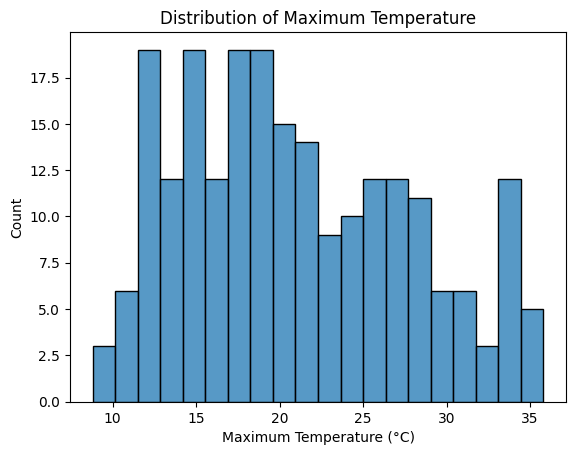

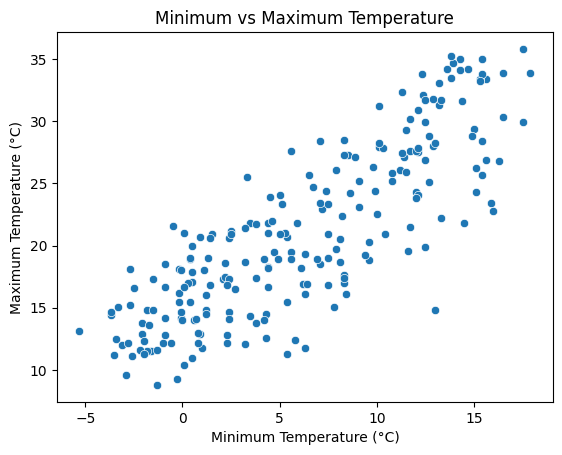

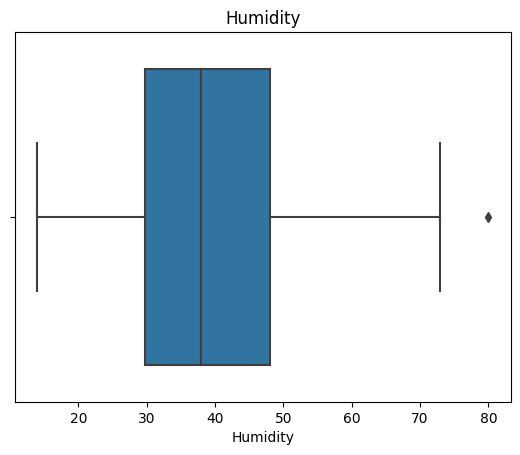

(366, 22)

In [50]:

# Create a histogram of the maximum temperature
sns.histplot(data=df2, x='MaxTemp', bins=20)
plt.title('Distribution of Maximum Temperature')
plt.xlabel('Maximum Temperature (°C)')
plt.ylabel('Count')
plt.show()

# Create a scatter plot of the minimum and maximum temperatures
sns.scatterplot(data=df2, x='MinTemp', y='MaxTemp')
plt.title('Minimum vs Maximum Temperature')
plt.xlabel('Minimum Temperature (°C)')
plt.ylabel('Maximum Temperature (°C)')
plt.show()

# Create a box plot of the humidity
sns.boxplot(data=df2, x='Humidity3pm')
plt.title('Humidity')
plt.xlabel('Humidity')
plt.show()
df.shape

In [59]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report
from imblearn.over_sampling import SMOTE

model=LogisticRegression()

df.fillna(df.mean())

sm=SMOTE(random_state=42)


features=df.drop(['RainToday'],axis=1)
result=df['RainToday']

x_train,x_test,y_train,y_test=train_test_split(features,result,test_size=0.2)

x_train_balanced,y_train_balanced=sm.fit_resample(x_train,y_train)
x_test_balanced,y_test_balanced=sm.fit_resample(x_test,y_test)

model.fit(x_train_balanced,y_train_balanced)

pred=model.predict(x_test_balanced)

print("Acuuracy-->",accuracy_score(y_test_balanced,pred))
print("Confusion matrix-->\n",confusion_matrix(y_test_balanced,pred))
print(classification_report(y_test_balanced,pred))

Acuuracy--> 0.9732142857142857
Confusion matrix-->
 [[55  1]
 [ 2 54]]
              precision    recall  f1-score   support

           0       0.96      0.98      0.97        56
           1       0.98      0.96      0.97        56

    accuracy                           0.97       112
   macro avg       0.97      0.97      0.97       112
weighted avg       0.97      0.97      0.97       112



/home/prasath/.local/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
